In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [257]:
df_games = pd.read_csv('data/steam_games_clean.csv', encoding='utf-8')

In [258]:
df_games.head(2)

,publisher,genres,app_name,title,price,early_access,id,developer,release_year
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018.0
1,Kotoshiro,Casual,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018.0


In [259]:
df_reviews = pd.read_csv('data/user_reviews_clean.csv', encoding='utf-8')


In [260]:
df_reviews.head(2)

,user_id,user_url,reviews_item_id,reviews_helpful,reviews_recommend,reviews_date,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,No ratings yet,True,2011-11-05,2
1,js41637,http://steamcommunity.com/id/js41637,251610,15 of 20 people (75%) found this review helpful,True,2014-06-24,2


In [261]:
df_items = pd.read_csv('data/user_items_clean.csv', encoding='utf-8')

In [262]:
df_items.head(2)

,item_id,item_name,playtime_forever,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


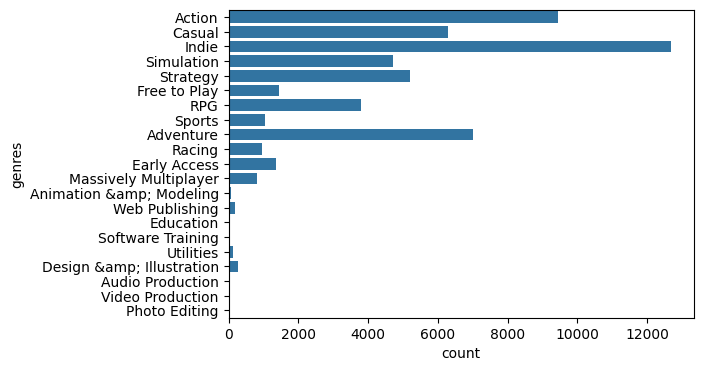

In [263]:
# Se comienza a hacer un EDA para conocer mejor los datos en el df_games
plt.figure(figsize=(6, 4))
# Se observa la cantidad de juegos por genero
sns.countplot(data=df_games, y='genres', orient='h')
plt.show()

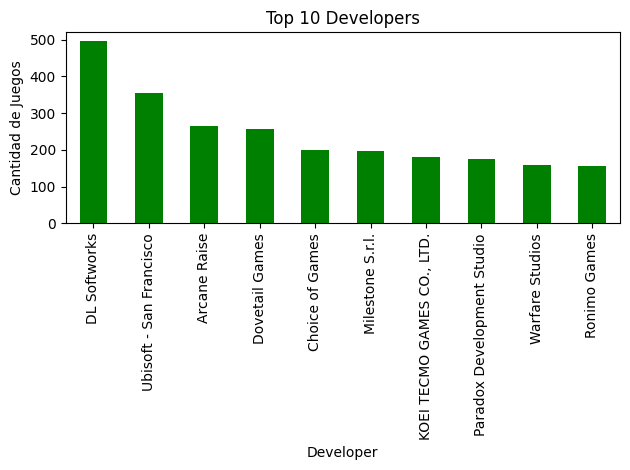

In [264]:
# Se revisa la cantidad de juegos por developer
dev_count = df_games['developer'].value_counts()
dev_count[:10].plot(kind='bar', color='green')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

# Se muestra la gráfica de salida
plt.tight_layout()
plt.show()

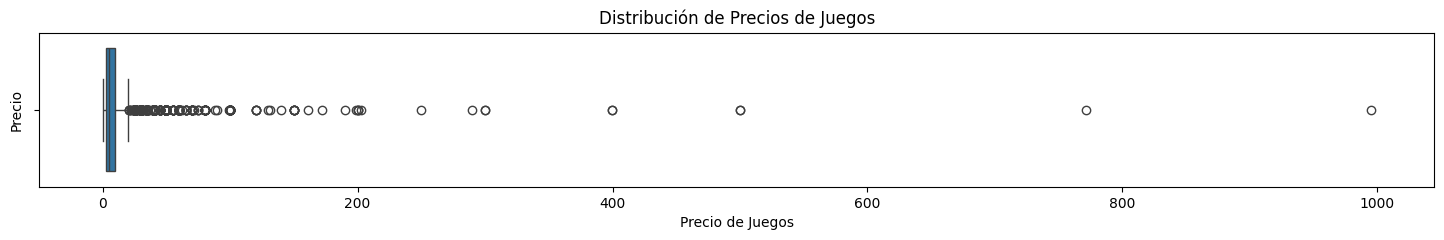

In [265]:
# Obtener los precios para cada juego y crear un DataFrame
unique_prices = df_games.groupby('id')['price'].unique().explode().reset_index()

# Crear la figura y el boxplot directamente con Seaborn
plt.figure(figsize=(18, 2))
ax = sns.boxplot(data=unique_prices, x='price')
ax.set_xlabel('Precio de Juegos')
ax.set_ylabel('Precio')
ax.set_title('Distribución de Precios de Juegos')

plt.show()

In [266]:
df_reviews.columns

Index(['user_id', 'user_url', 'reviews_item_id', 'reviews_helpful',
       'reviews_recommend', 'reviews_date', 'sentiment_analysis'],
      dtype='object')

C:\Users\cagca\AppData\Local\Temp\ipykernel_17312\3798471524.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reviews, x='sentiment_analysis', palette=["skyblue", "salmon"])
C:\Users\cagca\AppData\Local\Temp\ipykernel_17312\3798471524.py:6: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df_reviews, x='sentiment_analysis', palette=["skyblue", "salmon"])


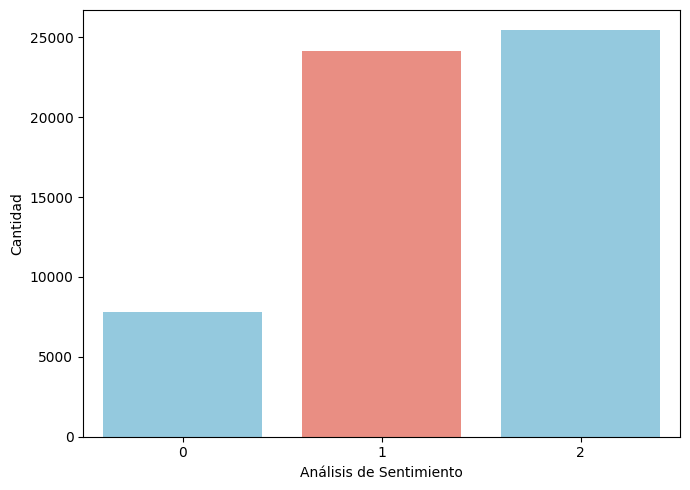

In [267]:
#Ahora se hará el EDA respecto al data frame reviews
#En este caso se hará un count plot de analisis de sentimiento

# Countplot para 'sentiment_analysis'
plt.figure(figsize=(7, 5))
sns.countplot(data=df_reviews, x='sentiment_analysis', palette=["skyblue", "salmon"])
plt.xlabel('Análisis de Sentimiento')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

C:\Users\cagca\AppData\Local\Temp\ipykernel_17312\413241484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_reviews["reviews_date"] = pd.to_datetime(df_date_reviews["reviews_date"])


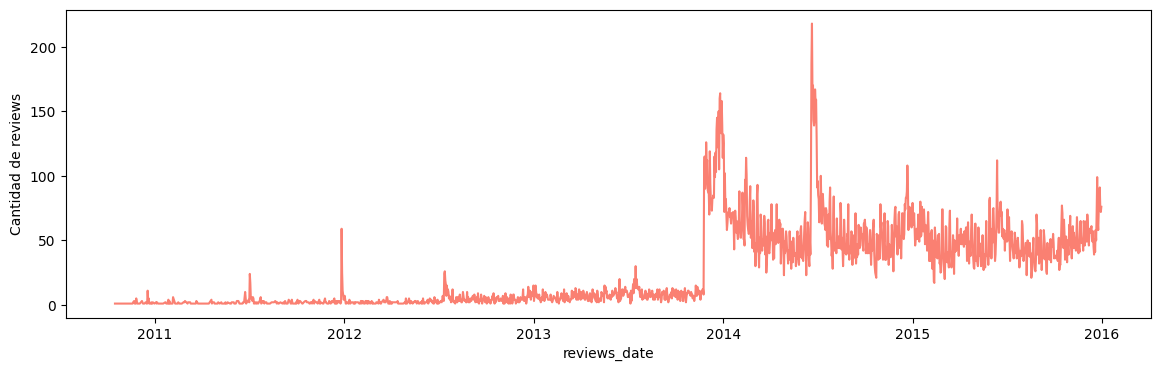

In [268]:
# Como hay campos no disponibles se filtra por unicamente fechas
df_date_reviews = df_reviews[df_reviews["reviews_date"].str.match(r"^\d{4}-\d{2}-\d{2}$")]
# Se pone el formato como date
df_date_reviews["reviews_date"] = pd.to_datetime(df_date_reviews["reviews_date"])

# Se calcula las reviews por la fecha
df_counts = df_date_reviews.groupby("reviews_date").count()

plt.figure(figsize=(14, 4))
sns.lineplot(data=df_counts, x="reviews_date", y="reviews_recommend",color='salmon')
plt.ylabel('Cantidad de reviews')
plt.show()

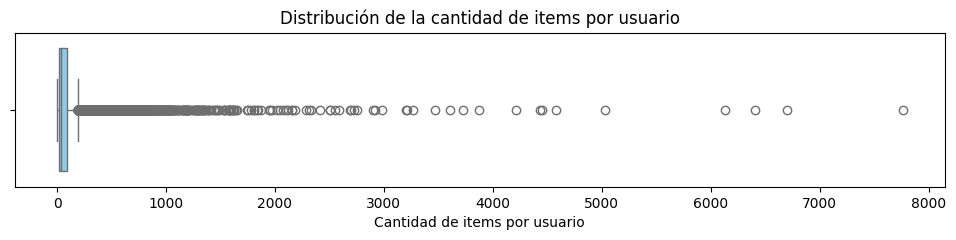

In [269]:
#Finalmente, se continua con el eda de Items

# Se junta la cantidad de usuarios y items para el conteo
items_count_user = df_items.groupby('user_id')['items_count'].count().reset_index()
items_count_user = items_count_user.sort_values('items_count', ascending=False)

# Crear el gráfico de caja (boxplot)
plt.figure(figsize=(12, 2))
sns.boxplot(data=items_count_user, x='items_count', color='skyblue')
plt.xlabel('Cantidad de items por usuario')
plt.title('Distribución de la cantidad de items por usuario')

plt.show()

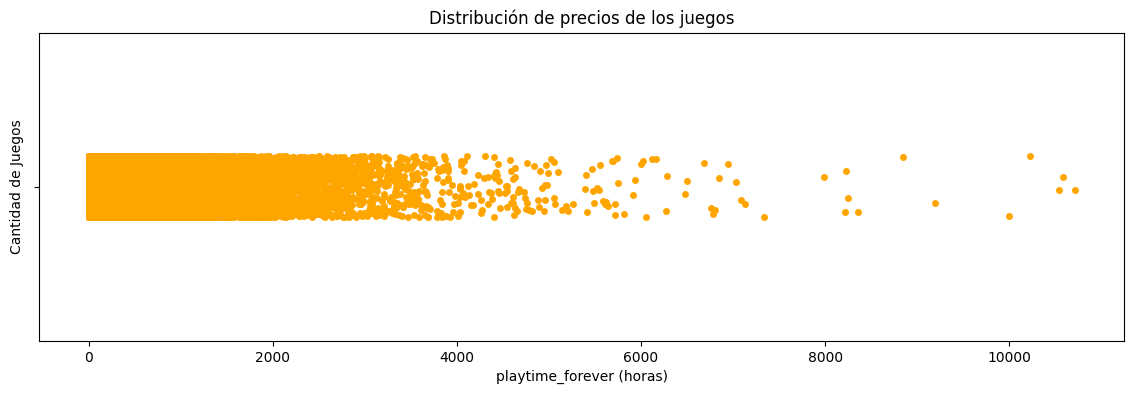

In [270]:
# Se calculan las horas para el grafico
df_items['playtime_hours'] = df_items['playtime_forever'] / 60
# Grafico de dispersion de horas por la cantidad de juegos
plt.figure(figsize=(14, 4))
sns.stripplot(data=df_items, x='playtime_hours', color='orange')
plt.xlabel('playtime_forever (horas)')
plt.ylabel('Cantidad de Juegos')
plt.title('Distribución de precios de los juegos')

plt.show()

Analizando la informacion y considerando que se necesita una métrica para el algoritmo de similitud, <br>
para terminos practicos y de cumplir con la funcionalidad del MVP, se tomará un enfoque simple <br>
Ahora dicho eso, se va a asignar una nueva metrica llamada combined_metric que tiene en cuenta las reviews <br>
recomendadas y el analisis de sentimiento, para que con base en esa metrica se aplique el <br>
algoritmo de similitud coseno

In [271]:
# Se asigna pesos a cada característica
weight_reviews = 0.7
weight_sentiment = 0.3

In [272]:
# Se calcula la métrica combinada
df_reviews['combined_metric'] = (weight_reviews * df_reviews['reviews_recommend'].astype(int)) + (weight_sentiment * df_reviews['sentiment_analysis'])

In [273]:
#Se dejan unicamente las columnas necesarias
df_reviews = df_reviews[['user_id', 'reviews_item_id', 'combined_metric']]
df_reviews.head(2)

,user_id,reviews_item_id,combined_metric
0,76561197970982479,1250,1.3
1,js41637,251610,1.3


In [274]:
# Se agarran las columnas necesarias de items y se borran los dumplicados
df_items = df_items[['item_id', 'item_name']]
df_items = df_items.drop_duplicates()

In [275]:
#Se agrega este df de items con los nombres de los juegos al df de reviews
df_for_pivot = df_reviews.merge(df_items, left_on="reviews_item_id", right_on="item_id", how='left')

In [276]:
df_for_pivot

,user_id,reviews_item_id,combined_metric,item_id,item_name
0,76561197970982479,1250,1.3,1250.0,Killing Floor
1,js41637,251610,1.3,251610.0,Barbie™ Dreamhouse Party™
2,evcentric,248820,1.3,248820.0,Risk of Rain
3,doctr,250320,1.3,250320.0,The Wolf Among Us
4,maplemage,211420,1.0,211420.0,Dark Souls: Prepare to Die Edition
...,...,...,...,...,...
57362,How51,440,1.0,NaN,NaN
57363,76561198111410893,304930,1.0,304930.0,Unturned
57364,zaza147,265630,1.3,265630.0,Fistful of Frags
57365,lifeonhigh,304050,1.3,304050.0,Trove


In [277]:
# Se borran los nulos
df_for_pivot = df_for_pivot.dropna(subset=['item_id'])

In [278]:
df_for_pivot

,user_id,reviews_item_id,combined_metric,item_id,item_name
0,76561197970982479,1250,1.3,1250.0,Killing Floor
1,js41637,251610,1.3,251610.0,Barbie™ Dreamhouse Party™
2,evcentric,248820,1.3,248820.0,Risk of Rain
3,doctr,250320,1.3,250320.0,The Wolf Among Us
4,maplemage,211420,1.0,211420.0,Dark Souls: Prepare to Die Edition
...,...,...,...,...,...
57360,76561198107177722,238460,1.3,238460.0,BattleBlock Theater
57361,kushikushigani,332310,0.7,332310.0,LEGO® Worlds
57363,76561198111410893,304930,1.0,304930.0,Unturned
57364,zaza147,265630,1.3,265630.0,Fistful of Frags


In [279]:
# Se dejan unicamente las columnas para la matriz pivot
df_model = df_for_pivot[['user_id', 'item_name', 'combined_metric']]
df_model.head()

,user_id,item_name,combined_metric
0,76561197970982479,Killing Floor,1.3
1,js41637,Barbie™ Dreamhouse Party™,1.3
2,evcentric,Risk of Rain,1.3
3,doctr,The Wolf Among Us,1.3
4,maplemage,Dark Souls: Prepare to Die Edition,1.0


In [280]:
df_model_ruta = 'data/recommendation_model.parquet'
df_model.to_parquet(df_model_ruta, index=False)